<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.029281,39.585940,93.874565,0.004140,194.493925,194.490245,0.003680
1,0.0,1.0,60.832094,66.155226,84.443744,0.004792,221.435856,221.431002,0.004855
2,0.0,2.0,58.631366,49.501755,60.945837,-0.000234,179.078724,179.078827,-0.000102
3,0.0,3.0,69.662376,28.502180,44.962386,-0.005701,153.121241,153.126313,-0.005072
4,0.0,4.0,94.440474,84.455642,34.099740,0.003395,222.999251,222.994044,0.005207
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,53.982254,26.520146,79.793200,-0.005429,170.290172,170.292803,-0.002631
119996,999.0,116.0,63.240532,22.503084,93.267353,-0.017519,188.993450,189.007643,-0.014193
119997,999.0,117.0,48.008160,78.635008,98.786898,-0.002062,235.428004,235.428535,-0.000531
119998,999.0,118.0,42.383094,52.373718,47.698809,0.001962,152.457583,152.454713,0.002869


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.029281  39.585940  93.874565  0.004140  194.493925   
      1.0    60.832094  66.155226  84.443744  0.004792  221.435856   
      2.0    58.631366  49.501755  60.945837 -0.000234  179.078724   
      3.0    69.662376  28.502180  44.962386 -0.005701  153.121241   
      4.0    94.440474  84.455642  34.099740  0.003395  222.999251   
...                ...        ...        ...       ...         ...   
999.0 115.0  53.982254  26.520146  79.793200 -0.005429  170.290172   
      116.0  63.240532  22.503084  93.267353 -0.017519  188.993450   
      117.0  48.008160  78.635008  98.786898 -0.002062  235.428004   
      118.0  42.383094  52.373718  47.698809  0.001962  152.457583   
      119.0  23.790553  61.117026  97.906808  0.003600  192.817987   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.490245  0.003680  
      1.0    221.431002  0.004855  
      2.0    179.078827 -0.000102  
      3.0    153.126313 -0.005072  
      4.0    222.994044  0.005207  
...                 ...       ...  
999.0 115.0  170.292803 -0.002631  
      116.0  189.007643 -0.014193  
      117.0  235.428535 -0.000531  
      118.0  152.454713  0.002869  
      119.0  192.812152  0.005835  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.029281  39.585940  93.874565  0.004140  194.493925   
      1.0    60.832094  66.155226  84.443744  0.004792  221.435856   
      2.0    58.631366  49.501755  60.945837 -0.000234  179.078724   
      3.0    69.662376  28.502180  44.962386 -0.005701  153.121241   
      4.0    94.440474  84.455642  34.099740  0.003395  222.999251   
...                ...        ...        ...       ...         ...   
999.0 115.0  53.982254  26.520146  79.793200 -0.005429  170.290172   
      116.0  63.240532  22.503084  93.267353 -0.017519  188.993450   
      117.0  48.008160  78.635008  98.786898 -0.002062  235.428004   
      118.0  42.383094  52.373718  47.698809  0.001962  152.457583   
      119.0  23.790553  61.117026  97.906808  0.003600  192.817987   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.490245  0.003680  
      1.0    221.431002  0.004855  
      2.0    179.078827 -0.000102  
      3.0    153.126313 -0.005072  
      4.0    222.994044  0.005207  
...                 ...       ...  
999.0 115.0  170.292803 -0.002631  
      116.0  189.007643 -0.014193  
      117.0  235.428535 -0.000531  
      118.0  152.454713  0.002869  
      119.0  192.812152  0.005835  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.029281,39.585940,93.874565,0.004140,194.493925,194.490245,0.003680
1,0.0,1.0,60.832094,66.155226,84.443744,0.004792,221.435856,221.431002,0.004855
2,0.0,2.0,58.631366,49.501755,60.945837,-0.000234,179.078724,179.078827,-0.000102
3,0.0,3.0,69.662376,28.502180,44.962386,-0.005701,153.121241,153.126313,-0.005072
4,0.0,4.0,94.440474,84.455642,34.099740,0.003395,222.999251,222.994044,0.005207
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,53.982254,26.520146,79.793200,-0.005429,170.290172,170.292803,-0.002631
119996,999.0,116.0,63.240532,22.503084,93.267353,-0.017519,188.993450,189.007643,-0.014193
119997,999.0,117.0,48.008160,78.635008,98.786898,-0.002062,235.428004,235.428535,-0.000531
119998,999.0,118.0,42.383094,52.373718,47.698809,0.001962,152.457583,152.454713,0.002869


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.029281  39.585940  93.874565  0.004140  194.493925   
      1.0    60.832094  66.155226  84.443744  0.004792  221.435856   
      2.0    58.631366  49.501755  60.945837 -0.000234  179.078724   
      3.0    69.662376  28.502180  44.962386 -0.005701  153.121241   
      4.0    94.440474  84.455642  34.099740  0.003395  222.999251   
...                ...        ...        ...       ...         ...   
999.0 115.0  53.982254  26.520146  79.793200 -0.005429  170.290172   
      116.0  63.240532  22.503084  93.267353 -0.017519  188.993450   
      117.0  48.008160  78.635008  98.786898 -0.002062  235.428004   
      118.0  42.383094  52.373718  47.698809  0.001962  152.457583   
      119.0  23.790553  61.117026  97.906808  0.003600  192.817987   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.490245  0.003680  
      1.0    221.431002  0.004855  
      2.0    179.078827 -0.000102  
      3.0    153.126313 -0.005072  
      4.0    222.994044  0.005207  
...                 ...       ...  
999.0 115.0  170.292803 -0.002631  
      116.0  189.007643 -0.014193  
      117.0  235.428535 -0.000531  
      118.0  152.454713  0.002869  
      119.0  192.812152  0.005835  

[120000 rows x 7 columns]

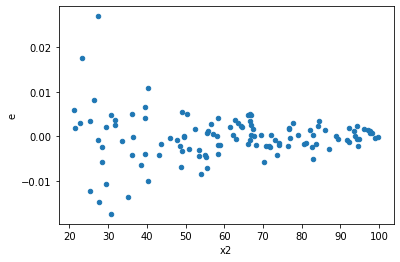

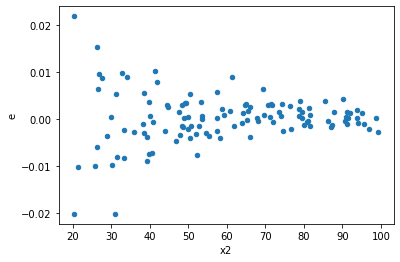

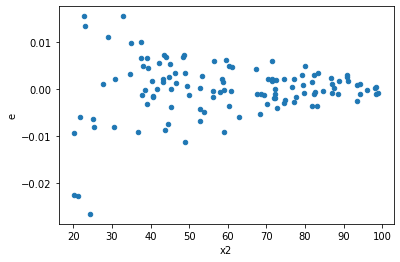

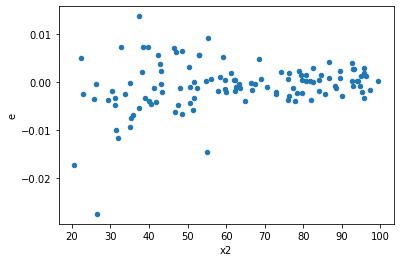

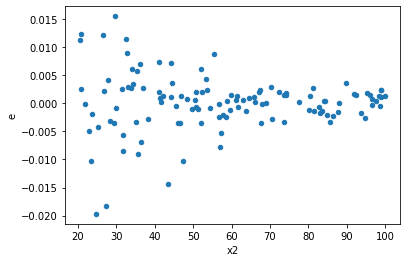

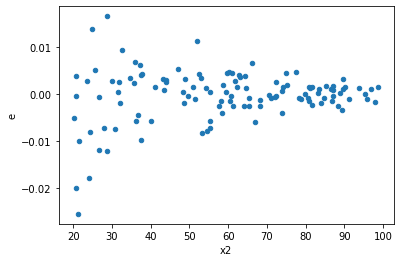

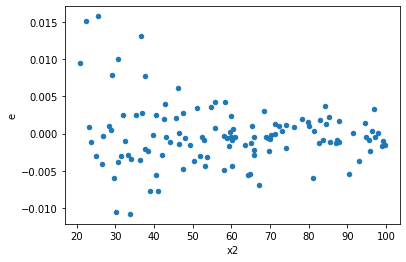

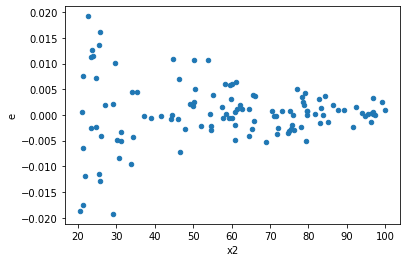

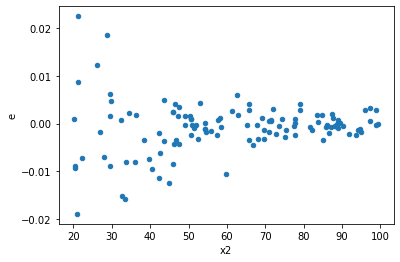

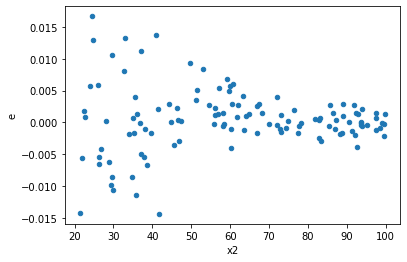

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,56.0,58.0,0.0014517994188547934,0.0019182093742821742,2.5924989622407026e-05,3.3072575418658175e-05,1.275702551875796,0.3596158726955929,0.8201920636522035,0.17980793634779646,Reject001=1 : Homoscedasticity
4.0,56.0,58.0,0.0006225323317859368,0.0023800995235899133,1.1116648781891729e-05,4.103619868258471e-05,3.691418114191924,1.8678954754047794e-06,0.9999990660522623,9.339477377023897e-07,Reject001=0 : Heteroscedasticity
5.0,68.0,46.0,0.0013088650224858962,0.0020646690044626628,1.9248015036557295e-05,4.488410879266658e-05,2.331882467226842,0.002852893628624509,0.9985735531856877,0.0014264468143122544,Reject001=0 : Heteroscedasticity
10.0,60.0,54.0,0.0005591608274438515,0.00265130396585217,9.319347124064192e-06,4.9098221589855e-05,5.26841858514689,4.96802865512791e-09,0.9999999975159857,2.484014327563955e-09,Reject001=0 : Heteroscedasticity
12.0,58.0,56.0,0.0010395781052217358,0.0025980737951590647,1.7923760434857513e-05,4.6394174913554726e-05,2.5884174853915662,0.00046657464193100573,0.9997667126790345,0.00023328732096550286,Reject001=0 : Heteroscedasticity
13.0,63.0,51.0,0.0005213167040574031,0.001676965955684779,8.274868318371477e-06,3.2881685405583905e-05,3.973680805600437,1.1849600447533248e-06,0.9999994075199776,5.924800223766624e-07,Reject001=0 : Heteroscedasticity
14.0,57.0,57.0,0.0003857336892400973,0.0019910833446884118,6.767257705966619e-06,3.4931286748919505e-05,5.1618082636517535,4.40896719133832e-09,0.9999999977955164,2.20448359566916e-09,Reject001=0 : Heteroscedasticity
15.0,53.0,61.0,0.0010922884163743908,0.00373696015564516,2.060921540329039e-05,6.12616418958223e-05,2.9725363482804634,5.237365114951764e-05,0.9999738131744252,2.618682557475882e-05,Reject001=0 : Heteroscedasticity
19.0,52.0,62.0,0.0006301319374294329,0.005052780129194358,1.2117921873642942e-05,8.149645369668319e-05,6.725282977268724,7.092770815120275e-12,0.9999999999964536,3.5463854075601375e-12,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,36.0,78.0,0.002252153105624743,0.0008239351809313337,6.25598084895762e-05,1.0563271550401714e-05,0.1688507654584937,8.438495643786408e-08,Reject001=0 : Heteroscedasticity
1.0,56.0,58.0,0.0014517994188547934,0.0019182093742821742,2.5924989622407026e-05,3.3072575418658175e-05,1.275702551875796,0.3596158726955929,Reject001=1 : Homoscedasticity
2.0,74.0,40.0,0.00399309466587759,0.00032470162881475167,5.396073872807554e-05,8.117540720368791e-06,0.15043420293549964,2.9442696526399115e-12,Reject001=0 : Heteroscedasticity
3.0,52.0,62.0,0.001515819477918783,0.0009444097358898654,2.915037457536121e-05,1.523241509499783e-05,0.5225461187683239,0.017338211977295948,Reject001=1 : Homoscedasticity
4.0,56.0,58.0,0.0006225323317859368,0.0023800995235899133,1.1116648781891729e-05,4.103619868258471e-05,3.691418114191924,1.8678954754047794e-06,Reject001=0 : Heteroscedasticity
5.0,68.0,46.0,0.0013088650224858962,0.0020646690044626628,1.9248015036557295e-05,4.488410879266658e-05,2.331882467226842,0.002852893628624509,Reject001=0 : Heteroscedasticity
6.0,49.0,65.0,0.001439589669714709,0.0004911828818845701,2.93793810145859e-05,7.556659721301079e-06,0.25720963003098823,2.233592133199112e-06,Reject001=0 : Heteroscedasticity
7.0,61.0,53.0,0.003186005432980865,0.0007813593353046211,5.222959726198139e-05,1.4742628968011719e-05,0.2822657983377381,3.046294341058597e-06,Reject001=0 : Heteroscedasticity
8.0,60.0,54.0,0.001962059113830664,0.001347840671084254,3.270098523051107e-05,2.4960012427486186e-05,0.7632801351868045,0.3080245319631419,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    795
Reject001=1 : Homoscedasticity      205
Name: Result_test, dtype: int64